### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import CrossTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Backtest with ADX

In [2]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
window=14
initial_cash = 10000.0
commission = 0.01
short_borrow_fee_inc_rate = 0.00001

# Download data and compute ADX
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data=data, indicator='adx', window=14, high='High', low='Low', close='Close')

Computing ADX...


In [3]:
data.head(5)

,Adj Close,Close,High,Low,Open,Volume,ADX_14,+DI_14,-DI_14
Date,,,,,,,,,
2020-01-02,72.716064,75.087502,75.150002,73.797501,74.059998,135480400,NaN,NaN,NaN
2020-01-03,72.009132,74.357498,75.144997,74.125000,74.287498,146322800,NaN,NaN,NaN
2020-01-06,72.582901,74.949997,74.989998,73.187500,73.447502,118387200,NaN,NaN,NaN
2020-01-07,72.241554,74.597504,75.224998,74.370003,74.959999,108872000,NaN,NaN,NaN
2020-01-08,73.403648,75.797501,76.110001,74.290001,74.290001,132079200,NaN,NaN,NaN


Computing ADX...

              ✨ Cross Trade (+DI_24/-DI_24) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-03-11 to 2022-12-30
  • Duration: 1024 days
  • Trading Days: 709

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $9,269.98
  • Total Return: -7.30%
  • Annualized Return: -2.66%
  • Number of Trades: 2
  • Total Commissions: $172.50

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -78.62%

📉 RISK METRICS:
  • Sharpe Ratio: -0.540
  • Sortino Ratio: -0.050
  • Maximum Drawdown: -9.70%
  • Average Drawdown: -9.68%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 849.0 days
  • Annualized Volatility: 4.75%



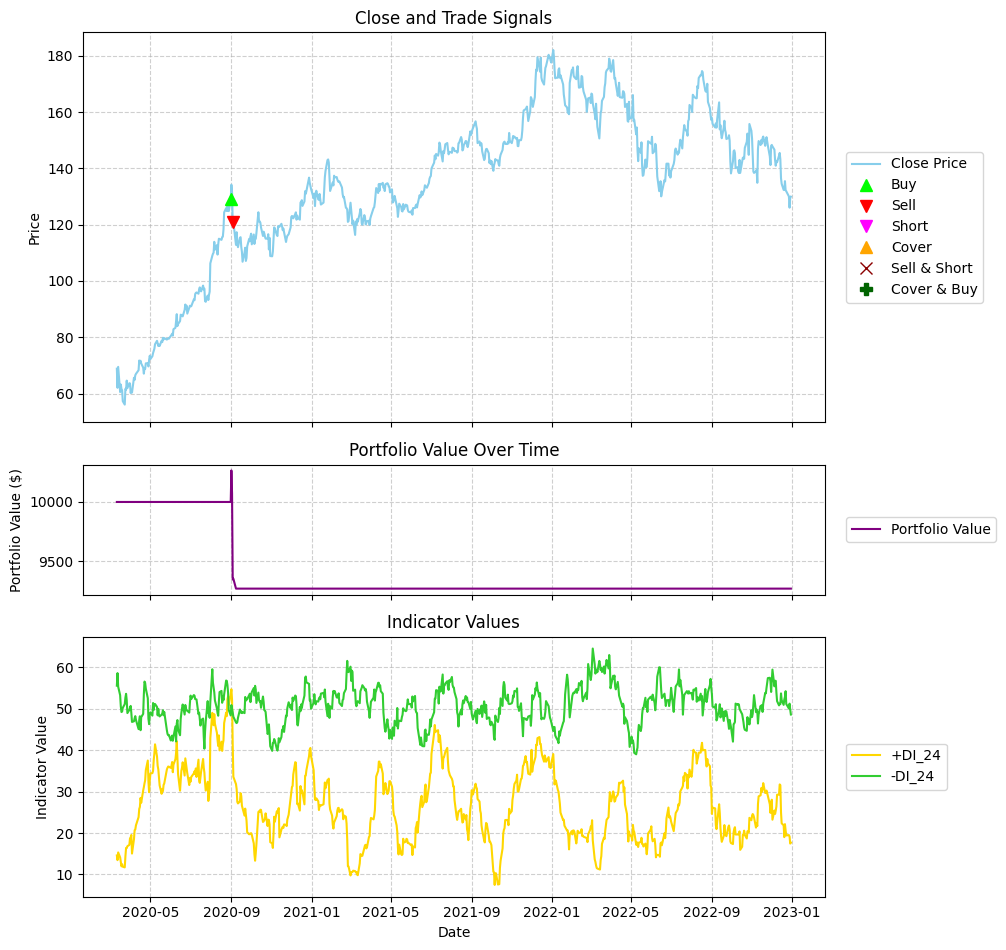

In [4]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
window=24
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data=data, indicator='adx', window=window, high='High', low='Low', close='Close')
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator=f'+DI_{window}',
    long_window_indicator=f'-DI_{window}',
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'+DI_{window}', f'-DI_{window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (+DI_{window} vs -DI_{window})"
)


### Backtest with EMA

Computing EMA...
Computing EMA...

              ✨ Cross Trade (EMA_25/EMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-02 to 2022-12-30
  • Duration: 1093 days
  • Trading Days: 756

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $12,542.52
  • Total Return: 25.43%
  • Annualized Return: 7.84%
  • Number of Trades: 12
  • Total Commissions: $1,347.12

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -45.89%

📉 RISK METRICS:
  • Sharpe Ratio: 0.430
  • Sortino Ratio: 0.410
  • Maximum Drawdown: -26.15%
  • Average Drawdown: -13.73%
  • Max Drawdown Duration: 360 days
  • Avg Drawdown Duration: 44.78 days
  • Annualized Volatility: 24.23%



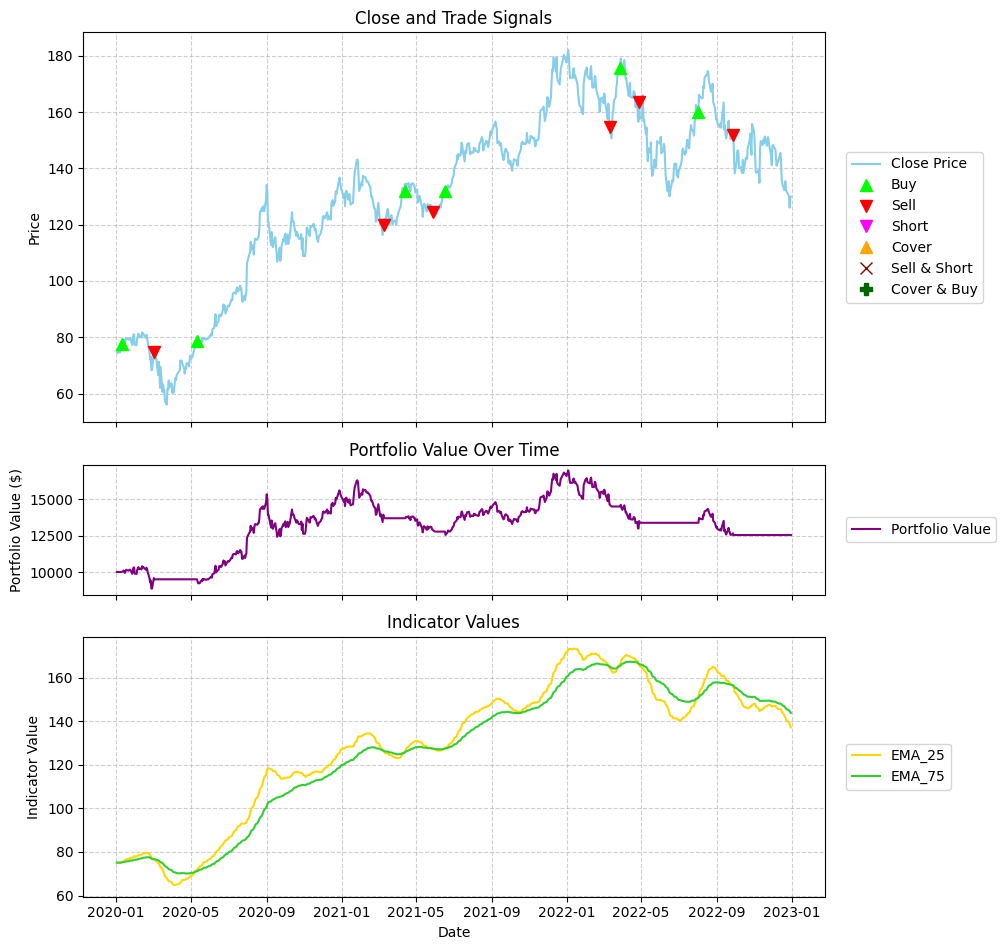

In [5]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='ema', window=short_window)
data = compute_indicator(data, indicator='ema', window=long_window)
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="EMA_25",
    long_window_indicator="EMA_75",
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'EMA_{short_window}', f'EMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (EMA-{short_window} vs EMA-{long_window})"
)

### Backtest with HMA

Computing HMA...
Computing HMA...

              ✨ Cross Trade (HMA_25/HMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-29 to 2022-12-30
  • Duration: 975 days
  • Trading Days: 675

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $10,851.34
  • Total Return: 8.51%
  • Annualized Return: 3.10%
  • Number of Trades: 28
  • Total Commissions: $2,722.90

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -62.81%

📉 RISK METRICS:
  • Sharpe Ratio: 0.250
  • Sortino Ratio: 0.160
  • Maximum Drawdown: -27.53%
  • Average Drawdown: -12.48%
  • Max Drawdown Duration: 464 days
  • Avg Drawdown Duration: 69.69 days
  • Annualized Volatility: 20.50%



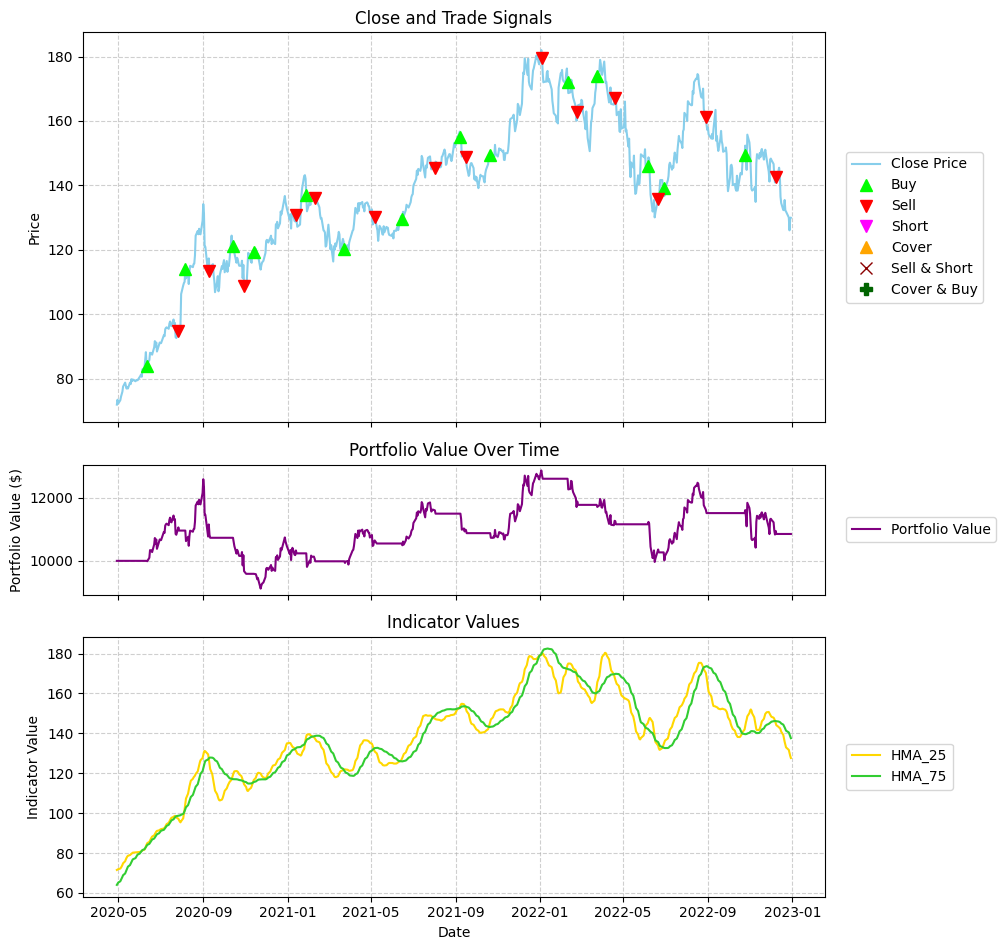

In [6]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='hma', window=short_window)
data = compute_indicator(data, indicator='hma', window=long_window)
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="HMA_25",
    long_window_indicator="HMA_75",
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'HMA_{short_window}', f'HMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot,
    title=f"Cross Trade (Long Only) (HMA-{short_window} vs HMA-{long_window})"
)

### Backtest with ICHI

Computing ICHIMOKU...

        ✨ Cross Trade (tenkan_sen_9/kijun_sen_26) ✨         

🗓️ BACKTEST PERIOD:
  • Period: 2021-06-23 to 2022-06-29
  • Duration: 371 days
  • Trading Days: 54

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $10,357.98
  • Total Return: 3.58%
  • Annualized Return: 17.84%
  • Number of Trades: 2
  • Total Commissions: $183.09

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 72.45%
  • Benchmark Final Value: $17,245.02
  • Strategy vs Benchmark: -68.87%

📉 RISK METRICS:
  • Sharpe Ratio: 0.590
  • Sortino Ratio: 0.640
  • Maximum Drawdown: -13.60%
  • Average Drawdown: -7.11%
  • Max Drawdown Duration: 175 days
  • Avg Drawdown Duration: 46.67 days
  • Annualized Volatility: 46.45%



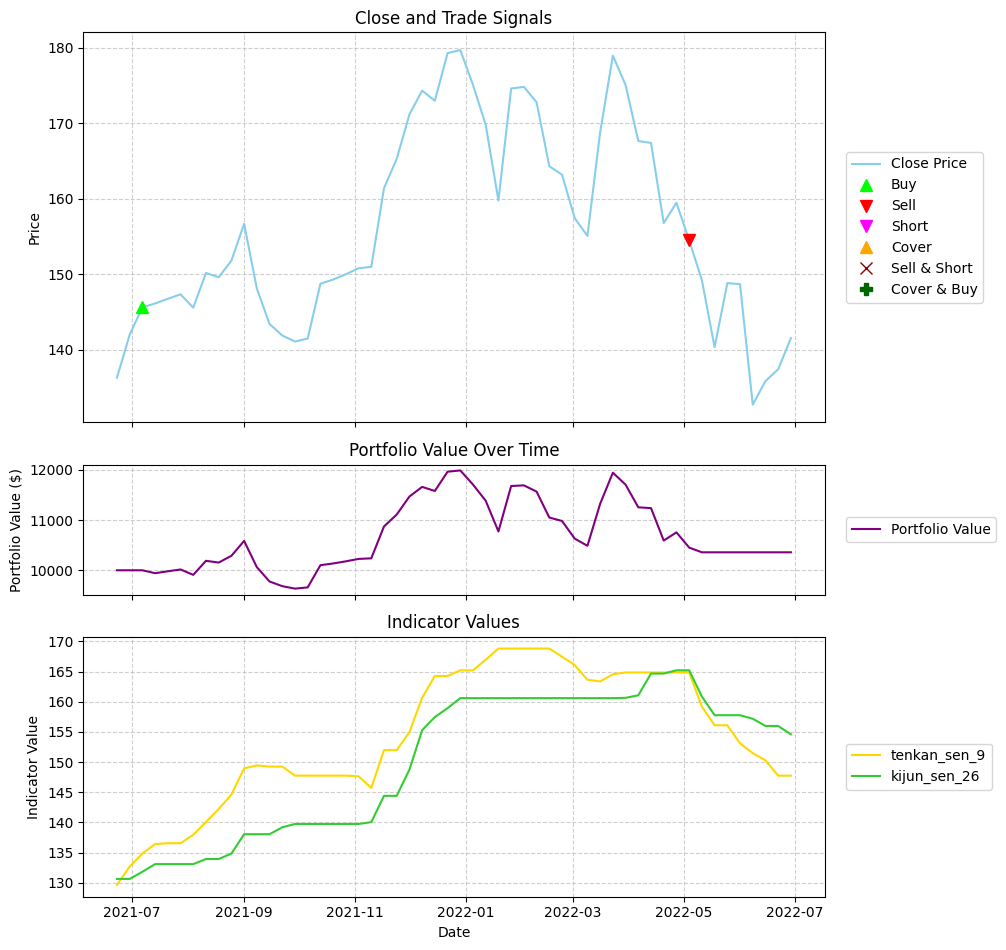

In [7]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1wk'
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data=data, indicator='ichimoku')

backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="tenkan_sen_9",
    long_window_indicator="kijun_sen_26",
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = ['tenkan_sen_9', 'kijun_sen_26']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot,
    title=f"Cross Trade (Long Only) (tenkan_sen_9, kijun_sen_26)"
)

### Backtesting with PSAR

Computing PSAR...

✨ Cross Trade (Close/PSAR_Bullish_0.03_0.03_0.3) [Day1 Long] ✨

🗓️ BACKTEST PERIOD:
  • Period: 2020-01-01 to 2021-12-29
  • Duration: 728 days
  • Trading Days: 105

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $16,638.39
  • Total Return: 66.38%
  • Annualized Return: 239.37%
  • Number of Trades: 11
  • Total Commissions: $1,308.20

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 135.68%
  • Benchmark Final Value: $23,568.07
  • Strategy vs Benchmark: -69.30%

📉 RISK METRICS:
  • Sharpe Ratio: 2.560
  • Sortino Ratio: 5.020
  • Maximum Drawdown: -25.88%
  • Average Drawdown: -13.97%
  • Max Drawdown Duration: 483 days
  • Avg Drawdown Duration: 119.0 days
  • Annualized Volatility: 54.02%



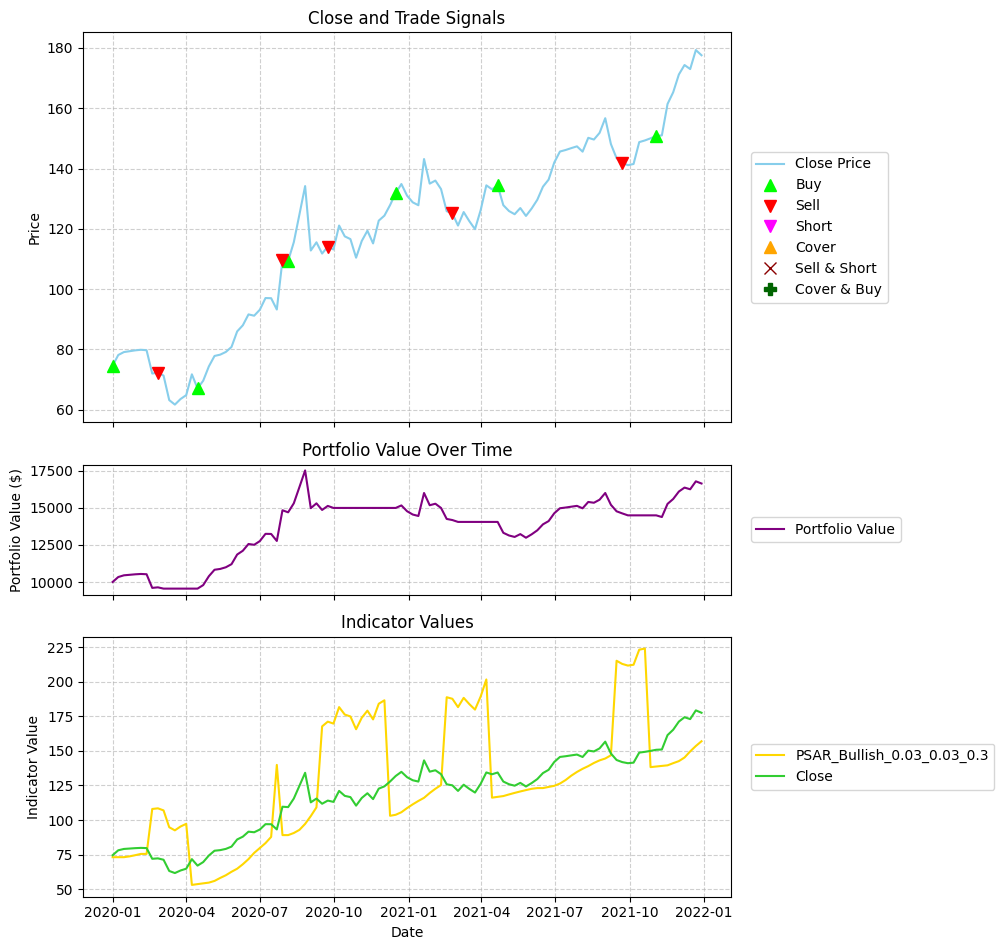

In [8]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'
interval = '1wk'
af_initial=0.03
af_step=0.03
af_max=0.3
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='psar', af_initial=0.03, af_step=0.03, af_max=0.3)
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator="Close",
    long_window_indicator=f"PSAR_Bullish_{af_initial}_{af_step}_{af_max}",
    price_col='Close',
    day1_position="long",
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'PSAR_Bullish_{af_initial}_{af_step}_{af_max}', 'Close']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot,
    title=f"Cross Trade (Long Only) (PSAR_Bullish_{af_initial}_{af_step}_{af_max} vs Close)"
)

### Backtest with SMA

Computing SMA...
Computing SMA...

              ✨ Cross Trade (SMA_25/SMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $11,400.77
  • Total Return: 14.01%
  • Annualized Return: 4.96%
  • Number of Trades: 16
  • Total Commissions: $1,936.74

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -57.31%

📉 RISK METRICS:
  • Sharpe Ratio: 0.320
  • Sortino Ratio: 0.260
  • Maximum Drawdown: -33.59%
  • Average Drawdown: -15.36%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 61.33 days
  • Annualized Volatility: 23.75%



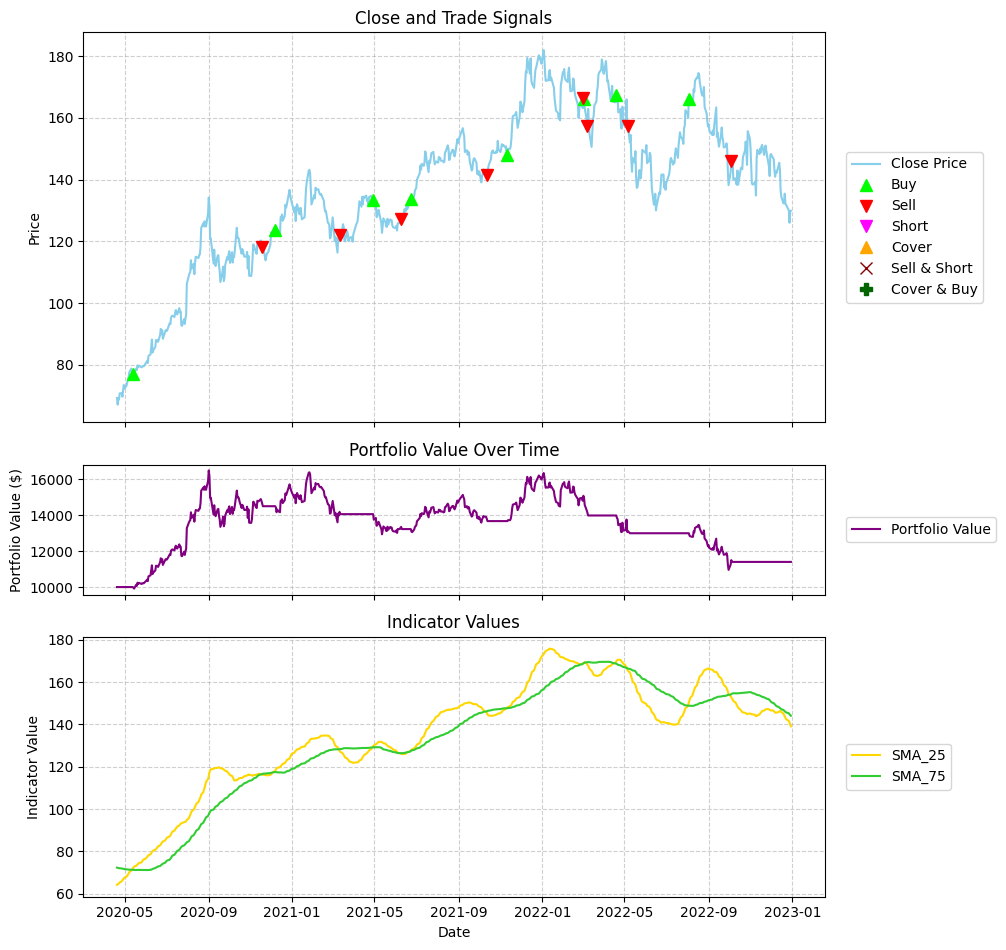

In [9]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='sma', window=short_window)
data = compute_indicator(data, indicator='sma', window=long_window)
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator=f'SMA_{short_window}',
    long_window_indicator=f'SMA_{long_window}',
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'SMA_{short_window}', f'SMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (SMA-{short_window} vs SMA-{long_window})"
)

### Backtest with WMA

Computing WMA...
Computing WMA...

              ✨ Cross Trade (WMA_25/WMA_75) ✨               

🗓️ BACKTEST PERIOD:
  • Period: 2020-04-20 to 2022-12-30
  • Duration: 984 days
  • Trading Days: 682

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $14,156.21
  • Total Return: 41.56%
  • Annualized Return: 13.70%
  • Number of Trades: 16
  • Total Commissions: $2,096.99

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 71.32%
  • Benchmark Final Value: $17,132.49
  • Strategy vs Benchmark: -29.76%

📉 RISK METRICS:
  • Sharpe Ratio: 0.670
  • Sortino Ratio: 0.730
  • Maximum Drawdown: -21.59%
  • Average Drawdown: -13.47%
  • Max Drawdown Duration: 849 days
  • Avg Drawdown Duration: 65.93 days
  • Annualized Volatility: 23.00%



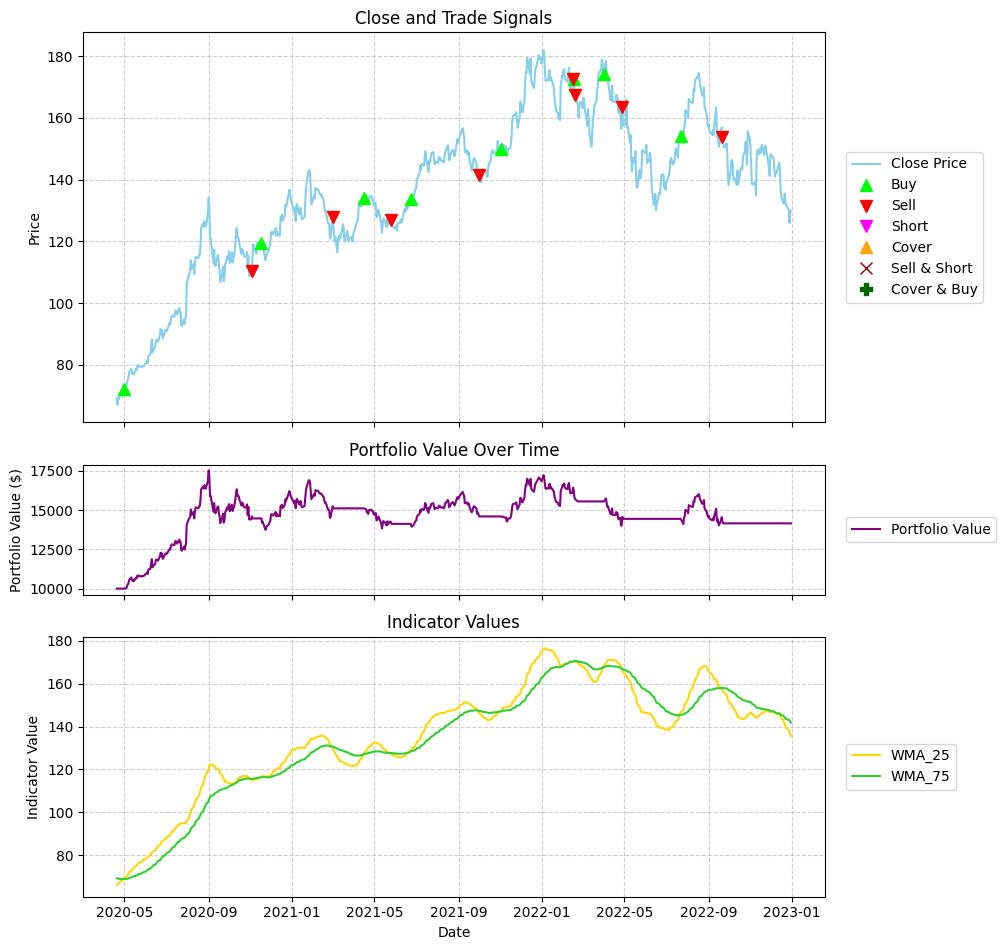

In [10]:
# --- Backtest Configuration ---
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'
interval = '1d'
short_window = 25
long_window = 75
initial_cash = 10000.0
commission = 0.01

# Download data and compute indicator
data = download_data(symbol, start_date, end_date, interval=interval)
data = compute_indicator(data, indicator='wma', window=short_window)
data = compute_indicator(data, indicator='wma', window=long_window)
backtester = CrossTradeBacktester(initial_cash=initial_cash, commission_long=commission)
results, portfolio = backtester.run_cross_trade(
    data=data,
    short_window_indicator=f'WMA_{short_window}',
    long_window_indicator=f'WMA_{long_window}',
    price_col='Close',
)

# --- Results ---
backtester.print_results(results)

# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = [f'WMA_{short_window}', f'WMA_{long_window}']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Cross Trade (Long Only) (WMA-{short_window} vs WMA-{long_window})"
)